In [10]:
import matplotlib.pyplot as plt
import json
import numpy as np

## Synthetic Dyn

In [3]:
def load_res(path):
    with open(path, 'r') as file:
        res = json.load(file)
    
    return res

def log_error_bars(means, stds):
    # Prevent log(0) or negative values
    means = np.array(means)
    stds = np.array(stds)
    lower = np.maximum(means - stds, 1e-10)
    upper = means + stds
    return [means - lower, upper - means]

def log_errorbar(ax, x, y, yerr, fmt, color, label=None, capsize=4, marker=None):
    y = max(y, 1e-10)  # Prevent log(0)
    lower = max(y - yerr, 1e-10)
    upper = y + yerr
    asymmetric_error = [[y - lower], [upper - y]]
    
    ax.errorbar(x, y, yerr=asymmetric_error, fmt=fmt, 
                color=color, label=label, capsize=capsize, marker=marker)

In [7]:
res_kur_gkan = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")
res_epid_gkan = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")
res_bio_gkan = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")
res_pop_gkan = load_res("./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")

res_gkan = [res_kur_gkan, res_epid_gkan, res_bio_gkan, res_pop_gkan]

res_kur_mpnn = load_res("./saved_models_optuna/model-kuramoto-mpnn/kuramoto_mpnn_ic1_s5_pd_mult_12/0/post_process_res.json")
res_epid_mpnn = load_res("./saved_models_optuna/model-epidemics-mpnn/epidemics_mpnn_ic1_s5_pd_mult_12/0/post_process_res.json")
res_bio_mpnn = load_res("./saved_models_optuna/model-biochemical-mpnn/biochemical_mpnn_ic1_s5_pd_mult_12/0/post_process_res.json")
res_pop_mpnn = load_res("./saved_models_optuna/model-population-mpnn/population_mpnn_ic1_s5_pd_mult_12/0/post_process_res.json")

res_mpnn = [res_kur_mpnn, res_epid_mpnn, res_bio_mpnn, res_pop_mpnn]

res_kur_tss = load_res("./saved_models_optuna/tss/Kuramoto-1/post_process_res.json")
res_epid_tss = load_res("./saved_models_optuna/tss/Epidemics-1/post_process_res.json")
res_bio_tss = load_res("./saved_models_optuna/tss/Biochemical-1/post_process_res.json")
res_pop_tss = load_res("./saved_models_optuna/tss/Population-1/post_process_res.json")

res_tss = [res_kur_tss, res_epid_tss, res_bio_tss, res_pop_tss]

## Plots

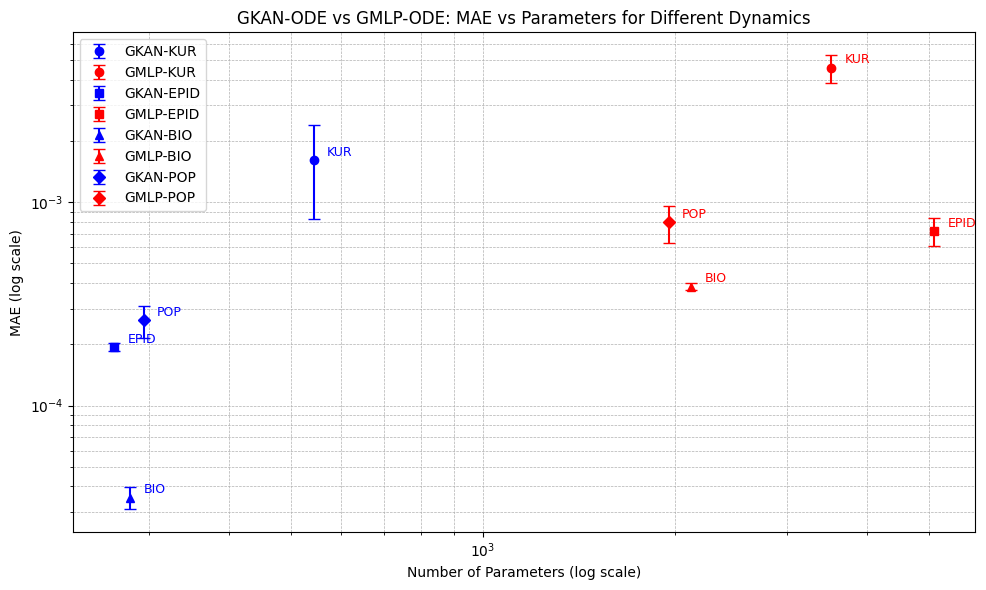

In [5]:
gkan_params = [res["Number of params"] for res in res_gkan]
gkan_losses = [res["model_test_MAE"] for res in res_gkan]
gkan_stds = [res["model_test_Std"] for res in res_gkan]

mpnn_params = [res["Number of params"] for res in res_mpnn]
mpnn_losses = [res["model_test_MAE"] for res in res_mpnn]
mpnn_stds = [res["model_test_Std"] for res in res_mpnn]

dynamics = ["KUR","EPID","BIO","POP"]

dynamics = ["KUR", "EPID", "BIO", "POP"]
markers = ['o', 's', '^', 'D']  # Unique marker per dynamic

plt.figure(figsize=(10, 6))
for i in range(len(dynamics)):
    # Plot GKAN with error bars
    plt.errorbar(gkan_params[i], gkan_losses[i], 
                 yerr=gkan_stds[i], fmt=markers[i], 
                 color='blue', label=f'GKAN-{dynamics[i]}', 
                 capsize=4)
    plt.text(gkan_params[i]*1.05, gkan_losses[i]*1.05, dynamics[i], 
             fontsize=9, color='blue')

    # Plot MPNN with error bars
    plt.errorbar(mpnn_params[i], mpnn_losses[i], 
                 yerr=mpnn_stds[i], fmt=markers[i], 
                 color='red', label=f'GMLP-{dynamics[i]}', 
                 capsize=4)
    plt.text(mpnn_params[i]*1.05, mpnn_losses[i]*1.05, dynamics[i], 
             fontsize=9, color='red')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Parameters (log scale)')
plt.ylabel('MAE (log scale)')
plt.title('GKAN-ODE vs GMLP-ODE: MAE vs Parameters for Different Dynamics')
plt.legend()
plt.grid(True, which='both', ls='--', linewidth=0.5)
plt.tight_layout()
plt.show()

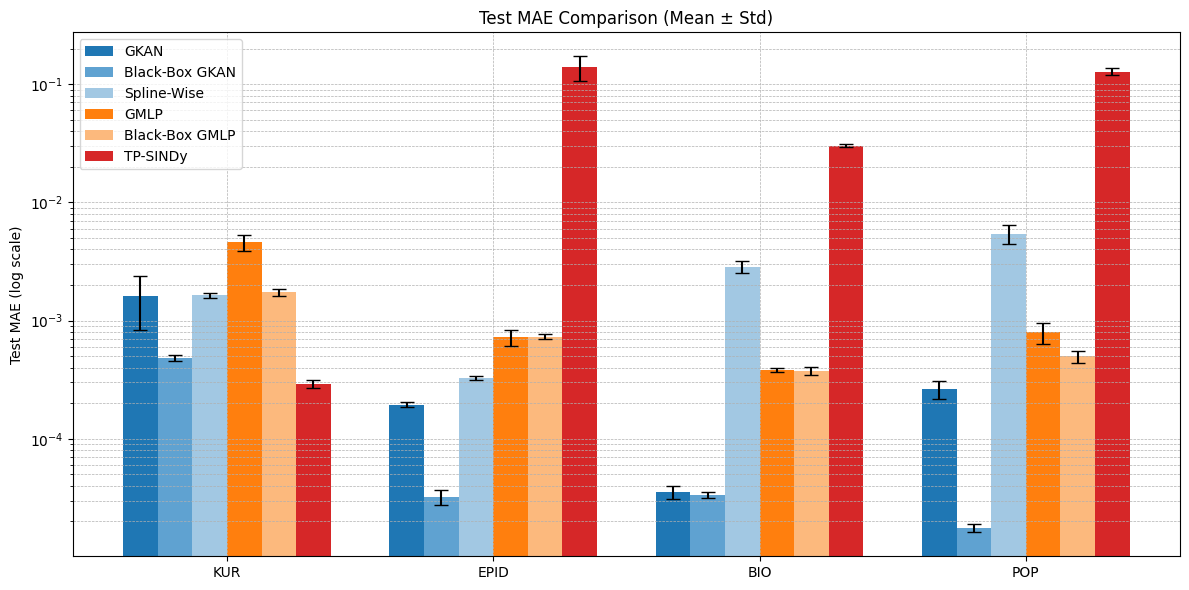

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define datasets and values for each setting
datasets = ['KUR', 'EPID', 'BIO', 'POP']

# Data: Mean and Std for each configuration

gkan_losses = [res["model_test_MAE"] for res in res_gkan]
gkan_stds = [res["model_test_Std"] for res in res_gkan]

black_box_means = [res["black_box_symb_test_MAE"] for res in res_gkan]
black_box_stds = [res["black_box_symb_test_Std"] for res in res_gkan] 

spline_means = [res["spline_wise_symb_test_MAE"] for res in res_gkan]
# print(spline_means)
spline_stds  = [res["spline_wise_symb_test_Std"] for res in res_gkan]

mpnn_losses = [res["model_test_MAE"] for res in res_mpnn]
mpnn_stds = [res["model_test_Std"] for res in res_mpnn]

black_box_mpnn = [res["black_box_symb_test_MAE"] for res in res_mpnn]
black_box_mpnn_stds = [res["black_box_symb_test_Std"] for res in res_mpnn] 

tpsindy_means = [res["tss_test_mae_"] for res in res_tss] 
tpsindy_stds = [res["tss_test_std_"] for res in res_tss]


# Plot setup
group_spacing = 1.
x = np.arange(len(datasets)) * group_spacing
width = 0.13

fig, ax = plt.subplots(figsize=(12, 6))

# Define custom color map
colors = {
    "gkan": ['#1f77b4', '#5fa2d1', '#a2c8e3'],  # shades of blue
    "mlp":  ['#ff7f0e', '#fcb97d'],             # shades of orange
    "tss":  ['#d62728']                         # red
}

# Plotting in order: GKAN, GKAN-BlackBox, GKAN-Spline, MLP, MLP-BlackBox, TSS
ax.bar(x - 2.5*width, gkan_losses, width, yerr=gkan_stds, label='GKAN', color=colors["gkan"][0], capsize=5)
ax.bar(x - 1.5*width, black_box_means, width, yerr=black_box_stds, label='Black-Box GKAN', color=colors["gkan"][1], capsize=5)
ax.bar(x - 0.5*width, spline_means, width, yerr=spline_stds, label='Spline-Wise', color=colors["gkan"][2], capsize=5)

ax.bar(x + 0.5*width, mpnn_losses, width, yerr=mpnn_stds, label='GMLP', color=colors["mlp"][0], capsize=5)
ax.bar(x + 1.5*width, black_box_mpnn, width, yerr=black_box_mpnn_stds, label='Black-Box GMLP', color=colors["mlp"][1], capsize=5)

ax.bar(x + 2.5*width, tpsindy_means, width, yerr=tpsindy_stds, label='TP-SINDy', color=colors["tss"][0], capsize=5)

# Labels and formatting
ax.set_ylabel('Test MAE (log scale)')
ax.set_title('Test MAE Comparison (Mean ± Std)')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.legend()
ax.grid(True, which="both", ls="--", linewidth=0.5)

plt.tight_layout()
plt.show()

In [9]:
exec_time_sw = [res["spline_wise_exec_time"] for res in res_gkan]
exec_time_gp = [res["black_box_exec_time"] for res in res_gkan]

exec_time_mean_sw = np.mean(exec_time_sw)
exec_time_std_sw = np.std(exec_time_sw)

In [10]:
print(exec_time_mean_sw)
print(exec_time_std_sw)

28.27181088924408
31.73778138542332


In [11]:
exec_time_mean_gp = np.mean(exec_time_gp)
exec_time_std_gp = np.std(exec_time_gp)

In [12]:
print(exec_time_mean_gp, exec_time_std_gp)

29.68035939335823 16.930724880728324


## Noise

In [41]:
res_kur_gkan_70db = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_2.json")
res_epid_gkan_70db = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_2.json")
res_bio_gkan_70db = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_2.json")
res_pop_gkan_70db = load_res("./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_2.json")

res_kur_gkan_50db = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_2.json")
res_epid_gkan_50db = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_2.json")
res_bio_gkan_50db = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_2.json")
res_pop_gkan_50db = load_res("./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_2.json")

res_kur_gkan_20db = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_noise_20db/0/post_process_res.json")
res_epid_gkan_20db = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_2.json")
res_bio_gkan_20db = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_noise_20db_2/0/post_process_res.json")
res_pop_gkan_20db = load_res("./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_2.json")

res_kur_mpnn_70db = load_res("./saved_models_optuna/model-kuramoto-mpnn/kuramoto_mpnn_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_seed.json")
res_epid_mpnn_70db = load_res("./saved_models_optuna/model-epidemics-mpnn/epidemics_mpnn_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_seed.json")
res_bio_mpnn_70db = load_res("./saved_models_optuna/model-biochemical-mpnn/biochemical_mpnn_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_seed.json")
res_pop_mpnn_70db = load_res("./saved_models_optuna/model-population-mpnn/population_mpnn_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_seed.json")

res_kur_mpnn_50db = load_res("./saved_models_optuna/model-kuramoto-mpnn/kuramoto_mpnn_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_seed.json")
res_epid_mpnn_50db = load_res("./saved_models_optuna/model-epidemics-mpnn/epidemics_mpnn_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_seed.json")
res_bio_mpnn_50db = load_res("./saved_models_optuna/model-biochemical-mpnn/biochemical_mpnn_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_seed.json")
res_pop_mpnn_50db = load_res("./saved_models_optuna/model-population-mpnn/population_mpnn_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_seed.json")

res_kur_mpnn_20db = load_res("./saved_models_optuna/model-kuramoto-mpnn/kuramoto_mpnn_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_seed.json")
res_epid_mpnn_20db = load_res("./saved_models_optuna/model-epidemics-mpnn/epidemics_mpnn_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_seed.json")
res_bio_mpnn_20db = load_res("./saved_models_optuna/model-biochemical-mpnn/biochemical_mpnn_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_seed.json")
res_pop_mpnn_20db = load_res("./saved_models_optuna/model-population-mpnn/population_mpnn_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_seed.json")


res_kur_gkan_noise = [
    res_kur_gkan_70db, res_kur_gkan_50db, res_kur_gkan_20db
]

res_epid_gkan_noise = [
    res_epid_gkan_70db, res_epid_gkan_50db, res_epid_gkan_20db 
]

res_bio_gkan_noise = [
    res_bio_gkan_70db, res_bio_gkan_50db, res_bio_gkan_20db 
]

res_pop_gkan_noise =[
    res_pop_gkan_70db, res_pop_gkan_50db, res_pop_gkan_20db 
]


res_kur_mpnn_noise = [
    res_kur_mpnn_70db, res_kur_mpnn_50db, res_kur_mpnn_20db
]

res_epid_mpnn_noise = [
    res_epid_mpnn_70db, res_epid_mpnn_50db, res_epid_mpnn_20db 
]

res_bio_mpnn_noise = [
    res_bio_mpnn_70db, res_bio_mpnn_50db, res_bio_mpnn_20db 
]

res_pop_mpnn_noise =[
    res_pop_mpnn_70db, res_pop_mpnn_50db, res_pop_mpnn_20db 
]

res_kur_tss = load_res("./saved_models_optuna/tss/Kuramoto-1/post_process_res.json")
res_epid_tss = load_res("./saved_models_optuna/tss/Epidemics-1/post_process_res.json")
res_bio_tss = load_res("./saved_models_optuna/tss/Biochemical-1/post_process_res.json")
res_pop_tss = load_res("./saved_models_optuna/tss/Population-1/post_process_res.json")



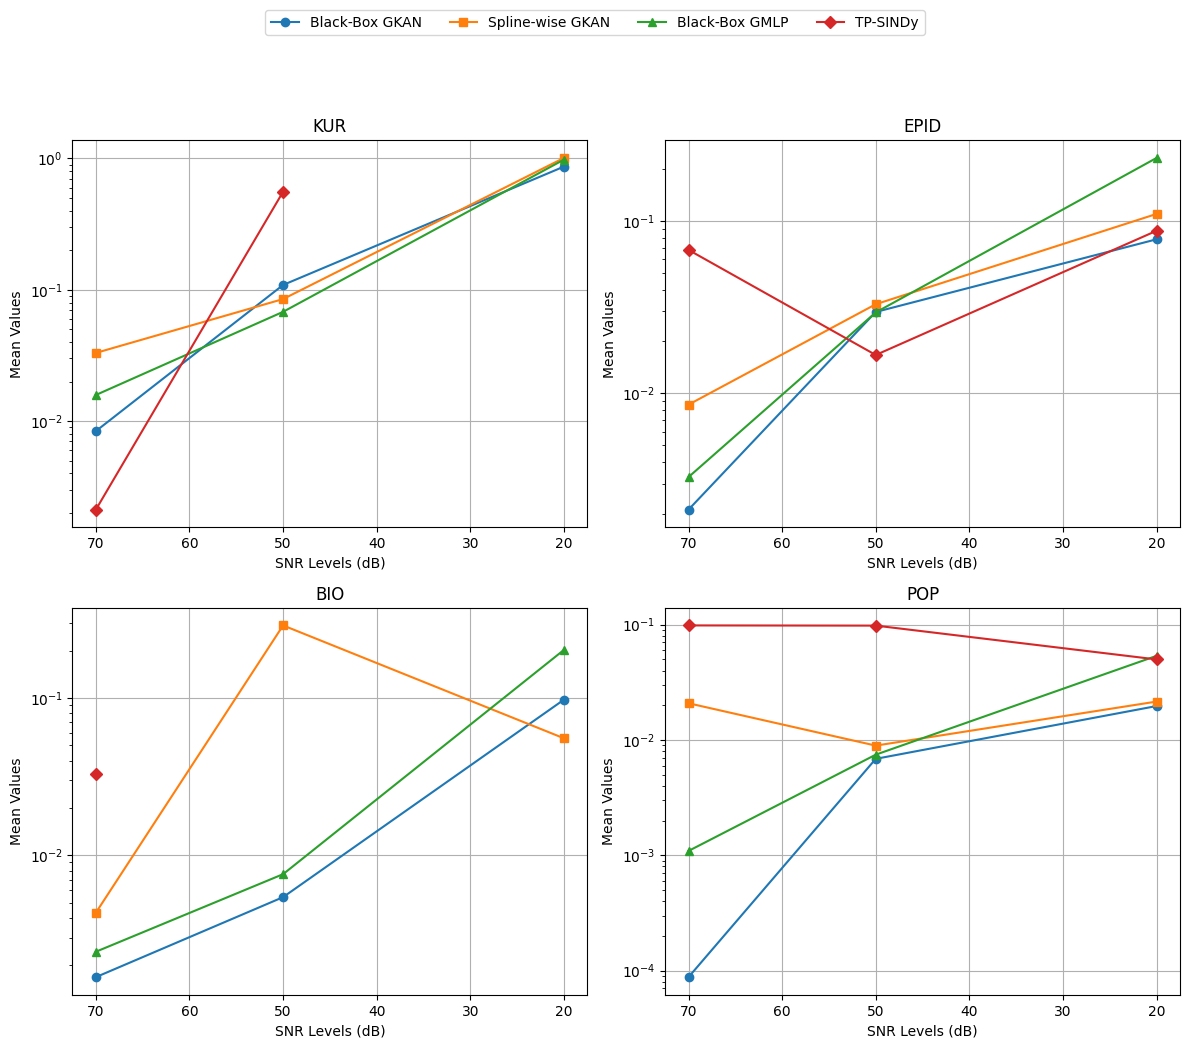

In [42]:
snr_levels = [70, 50, 20]

# Example data for 4 different dynamics (replace with your actual values)
dynamics_data = {
    'KUR': {
        'gkan_bb': [res["black_box_symb_test_MAE"] for res in res_kur_gkan_noise],
        'gkan_sw': [res["spline_wise_symb_test_MAE"] for res in res_kur_gkan_noise],
        'mpnn_bb': [res["black_box_symb_test_MAE"] for res in res_kur_mpnn_noise],
        "tss": [res_kur_tss["tss_test_mae_70db"], res_kur_tss["tss_test_mae_50db"]]
    },
    'EPID': {
        'gkan_bb': [res["black_box_symb_test_MAE"] for res in res_epid_gkan_noise],
        'gkan_sw': [res["spline_wise_symb_test_MAE"] for res in res_epid_gkan_noise],
        'mpnn_bb': [res["black_box_symb_test_MAE"] for res in res_epid_mpnn_noise],
        "tss": [res_epid_tss["tss_test_mae_70db"], res_epid_tss["tss_test_mae_50db"], res_epid_tss["tss_test_mae_20db"]]
    },
    'BIO': {
        'gkan_bb': [res["black_box_symb_test_MAE"] for res in res_bio_gkan_noise],
        'gkan_sw': [res["spline_wise_symb_test_MAE"] for res in res_bio_gkan_noise],
        'mpnn_bb': [res["black_box_symb_test_MAE"] for res in res_bio_mpnn_noise],
        "tss": [res_bio_tss["tss_test_mae_70db"]]
    },
    'POP': {
        'gkan_bb': [res["black_box_symb_test_MAE"] for res in res_pop_gkan_noise],
        'gkan_sw': [res["spline_wise_symb_test_MAE"] for res in res_pop_gkan_noise],
        'mpnn_bb': [res["black_box_symb_test_MAE"] for res in res_pop_mpnn_noise],
        "tss": [res_pop_tss["tss_test_mae_70db"], res_pop_tss["tss_test_mae_50db"], res_pop_tss["tss_test_mae_20db"]]
    }
}

# Plotting
# fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
# axes = axes.flatten()

# for idx, (title, data) in enumerate(dynamics_data.items()):
#     ax = axes[idx]
#     ax.plot(snr_levels, data['gkan_bb'], marker='o', label='Black-Box GKAN')
#     ax.plot(snr_levels, data['gkan_sw'], marker='s', label='Spline-wise GKAN')
#     ax.plot(snr_levels, data['mpnn_bb'], marker='^', label='Black-Box GMLP')
    
#     ax.set_title(title)
#     ax.set_xlabel('SNR Levels (dB)')
#     ax.set_ylabel('Mean Values')
#     ax.invert_xaxis()
#     ax.grid(True)
#     ax.legend()

# plt.tight_layout()
# plt.show()
# Adjust the number of subplots based on how many titles/datasets you have
num_plots = len(dynamics_data)
cols = 2
rows = (num_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily index

for idx, (title, data) in enumerate(dynamics_data.items()):
    ax = axes[idx]
    ax.plot(snr_levels, data['gkan_bb'], marker='o', label='Black-Box GKAN')
    ax.plot(snr_levels, data['gkan_sw'], marker='s', label='Spline-wise GKAN')
    ax.plot(snr_levels, data['mpnn_bb'], marker='^', label='Black-Box GMLP')
    
    tss_values = data['tss']
    if tss_values:
        tss_snr_levels = snr_levels[:len(tss_values)]
        ax.plot(tss_snr_levels, tss_values, marker='D', label='TP-SINDy')
    
    ax.set_title(title)
    ax.set_xlabel('SNR Levels (dB)')
    ax.set_ylabel('Mean Values')
    ax.invert_xaxis()
    ax.grid(True)
    ax.set_yscale('log')

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for all subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Real Epid

In [11]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
import numpy as np

import torch
from main import set_pytorch_seed
from post_processing import get_model, make_callable, plot_predictions
import pandas as pd
import sympy as sp
from sklearn.metrics import mean_absolute_error

set_pytorch_seed(0)

In [12]:
from post_processing_real_epid import get_scaler

def eval_real_epid_int(data, countries_dict, build_symb_model, inferred_coeffs, scaler=None, use_euler=False, tr_perc = 0.8,
                       device='cuda:0'):
    y_true = data[0].y.detach().cpu().numpy()
    y_pred = np.zeros_like(y_true)
    
    for country_name, node_idx in countries_dict.items():
        symb_model = build_symb_model(country_name, inferred_coeffs)
        symb_model = symb_model.to(device)
        # print(f"{country_name}")
        data_0 = data[0].cpu()
        if scaler is not None:
            tmp = scaler.transform(data[0].x)
            data_0 = data[0]
            data_0.x = tmp
        
        data_0 = data_0.to(device)
        if use_euler:
            symb_model.integration_method = "euler"
            data_0.t_span = torch.arange(y_true.shape[0] + 1, device=data_0.x.device, dtype=data_0.t_span.dtype)
        
        try:
            pred = symb_model(data_0).detach().cpu().numpy()
        except AssertionError:
            print("Failed")
            continue
        
        if scaler is not None:
            pred = scaler.inverse_transform(pred)
        
        y_pred[:, node_idx, :] = pred[:, node_idx, :]
    
        
    tr_len = y_true.shape[0]
    tr_end = int(tr_perc * tr_len)
    y_true_val = y_true[tr_end:, :, :]
    y_pred_val = y_pred[tr_end:, :, :] 
    
    return y_true, y_pred, y_true_val, y_pred_val 


def eval_real_epid_journal(data, countries_dict, build_symb_model, inferred_coeffs, tr_perc = 0.8, step_size=1.0, scaler = None):
    def get_dxdt_pred(data, symb_model):
        dxdt_pred = []
        for snapshot in data:
            dxdt_pred.append(symb_model(snapshot))
        
        return torch.stack(dxdt_pred, dim=0)
    
    def sum_over_dxdt(dxdt_pred):
        out = []
        for i in range(dxdt_pred.shape[0]):
            out.append(torch.sum(step_size*dxdt_pred[0:i+1, :, :], dim=0)) 
        
        return torch.stack(out, dim=0)
        
    def integrate(out, x0):
        pred = []
        for i in range(1, out.shape[0]):
            pred.append(x0 + out[i, :, :])
        return torch.stack(pred, dim=0)
      
    x0 = data[0].x
    y_true = torch.stack([d.x for d in data[1:]], dim=0).detach().cpu().numpy()
    y_pred = np.zeros_like(y_true)
    
    for country_name, node_idx in countries_dict.items():
        symb_model = build_symb_model(country_name, inferred_coeffs)
        symb_model.predict_deriv = True
        dxdt_pred = get_dxdt_pred(data, symb_model)
        out = sum_over_dxdt(dxdt_pred)
        pred = integrate(out, x0).detach().cpu().numpy()
        y_pred[:, node_idx, :] = pred[:, node_idx, :]
    
    if scaler is not None:
        y_pred = scaler.inverse_transform(y_pred)
        y_true = scaler.inverse_transform(y_true)
    
    
    tr_len = y_true.shape[0]
    tr_end = int(tr_perc * tr_len)
    y_true_val = y_true[tr_end:, :, :]
    y_pred_val = y_pred[tr_end:, :, :] 
    
    return y_true, y_pred, y_true_val, y_pred_val

In [5]:
from datasets.RealEpidemics import RealEpidemics

real_epid_data = RealEpidemics(
    root = './data_real_epid_covid_int',
    name = 'RealEpid',
    predict_deriv=False,
    history=1,
    horizon=44,
    scale=False
)

with open('./data_real_epid_covid_int/RealEpid/countries_dict.json', 'r') as f:
    countries_dict = json.load(f)

### TSS

In [13]:
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_covid = pd.read_csv("./saved_models_optuna/tss/real_epid_covid/Inferred_coefficients_covid.csv").values

def build_symb_model_tss(country, inf_coeff_covid):
    x_i, x_j = sp.symbols('x_i x_j')    
    country_idx = countries_dict[country]

    g_symb = inf_coeff_covid[1, country_idx] * (1 / (1 + sp.exp(- (x_j - x_i))))
    h_symb = inf_coeff_covid[0, country_idx] * x_i

    g_symb = make_callable(g_symb)
    h_symb = make_callable(h_symb)

    symb_model = get_model(
        g = g_symb,
        h = h_symb,
        message_passing=False,
        include_time=False,
        integration_method='rk4'
    )
    
    return symb_model

y_true_tss, y_pred_tss, y_true_val_tss, y_pred_val_tss = eval_real_epid_int(
    data = real_epid_data,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_covid,
    build_symb_model=build_symb_model_tss,
    use_euler=True
)

In [14]:
print(f"Validation MAE: {mean_absolute_error(y_true_val_tss.flatten(), y_pred_val_tss.flatten())}")
print(f"Overall MAE: {mean_absolute_error(y_true_tss.flatten(), y_pred_tss.flatten())}")

Validation MAE: 50494.55859375
Overall MAE: 12133.4560546875


In [14]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_tss,
        y_pred=y_pred_tss,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/tss/real_epid_covid/figures"
    )

#### Journal

In [15]:
data_real_epid_orig = RealEpidemics(
    root = './data_real_epid_covid_orig',
    name = 'RealEpid',
    predict_deriv=True,
    scale=False,
)

y_true_tss_jrn, y_pred_tss_jrn, y_true_val_tss_jrn, y_pred_val_tss_jrn = eval_real_epid_journal(
    data = data_real_epid_orig[2:-2],
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_tss,
    inferred_coeffs=inf_coeff_covid,
    tr_perc=0.8
)

In [16]:
print(f"Validation MAE: {mean_absolute_error(y_true_val_tss_jrn.flatten(), y_pred_val_tss_jrn.flatten())}")
print(f"Overall MAE: {mean_absolute_error(y_true_tss_jrn.flatten(), y_pred_tss_jrn.flatten())}")

Validation MAE: 757.14208984375
Overall MAE: 413.9864807128906


In [17]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_tss_jrn,
        y_pred=y_pred_tss_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/tss/real_epid_covid/figures_journal"
    )

### GKAN

In [6]:
scaler = get_scaler(data = real_epid_data, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_covid = pd.read_csv("./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/inferred_coeffs_covid.csv")
# inf_coeff_covid = pd.read_csv("./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/inferred_coeff.csv")

def build_symb_model_gkan(country, inf_coeff_covid):
    x_i, x_j = sp.symbols('x_i x_j')    

    coeffs = inf_coeff_covid[country]
    a, b, _, _, c = coeffs.iloc[0], coeffs.iloc[1], coeffs.iloc[2], coeffs.iloc[3], coeffs.iloc[4] 

    g_symb = sp.exp(c * x_j)
    h_symb = b * x_i + a
    # a, b, c = coeffs.iloc[0], coeffs.iloc[1], coeffs.iloc[2] 

    # g_symb = sp.exp(c * x_j)
    # h_symb = b * x_i + a
    
    g_symb = make_callable(g_symb)
    h_symb = make_callable(h_symb)
    
    symb_model = get_model(
        g = g_symb,
        h = h_symb,
        message_passing=False,
        include_time=False,
        integration_method='dopri5'
    )
    
    return symb_model

y_true_gkan, y_pred_gkan, y_true_val_gkan, y_pred_val_gkan = eval_real_epid_int(
    data = real_epid_data,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_gkan,
    scaler=scaler,
    use_euler=False,
    inferred_coeffs=inf_coeff_covid,
    tr_perc=0.8
)

In [7]:
print(f"Validation MAE: {mean_absolute_error(y_true_val_gkan.flatten(), y_pred_val_gkan.flatten())}")
print(f"Overall MAE: {mean_absolute_error(y_true_gkan.flatten(), y_pred_gkan.flatten())}")

Validation MAE: 436.7903137207031
Overall MAE: 440.3345642089844


In [20]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_gkan,
        y_pred=y_pred_gkan,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/figures"
    )

#### Journal

In [21]:
data_real_epid_scaled = RealEpidemics(
    root = './data_real_epid_covid_scaled',
    name = 'RealEpid',
    predict_deriv=True,
    scale=True,
    scale_range=(-1, 1),
    train_perc=0.8,
)
t = real_epid_data.t_sampled
epsilon = t[0][1] - t[0][0]
scaler = get_scaler(data = real_epid_data, tr_perc=0.8)

y_true_gkan_jrn, y_pred_gkan_jrn, y_true_val_gkan_jrn, y_pred_val_gkan_jrn = eval_real_epid_journal(
    data = data_real_epid_scaled[2:-2],
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_gkan,
    tr_perc=0.8,
    step_size=epsilon,
    inferred_coeffs=inf_coeff_covid,
    scaler=scaler
)

Processing...
Done!


Building the dataset...


In [22]:
print(f"Validation MAE: {mean_absolute_error(y_true_val_gkan_jrn.flatten(), y_pred_val_gkan_jrn.flatten())}")
print(f"Overall MAE: {mean_absolute_error(y_true_gkan_jrn.flatten(), y_pred_gkan_jrn.flatten())}")

Validation MAE: 737.4694213867188
Overall MAE: 378.0634765625


In [23]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_gkan_jrn,
        y_pred=y_pred_gkan_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/figures_journal"
    )

### MPNN

In [8]:
scaler = get_scaler(data = real_epid_data, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_covid = pd.read_csv("./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/inferred_coeffs_covid_.csv")

def build_symb_model_mpnn(country, inf_coeff_covid):
    
    coeffs = inf_coeff_covid[country]
    a, _, b, _, c, = coeffs.iloc[0], coeffs.iloc[1], coeffs.iloc[2], coeffs.iloc[3], coeffs.iloc[4] 

    
    expr1 = sp.ln(sp.Max(sp.tan(x_i + c)**2 + 1, 1e-6))
    expr2 = a * sp.ln(sp.Max(x_i + b, 1e-6))
    
    g_symb = make_callable(expr1)
    h_symb = make_callable(expr2)
    
    symb_model = get_model(
        g = g_symb,
        h = h_symb,
        message_passing=False,
        include_time=False,
        integration_method='dopri5'
    )
    
    return symb_model

y_true_mpnn, y_pred_mpnn, y_true_val_mpnn, y_pred_val_mpnn = eval_real_epid_int(
    data = real_epid_data,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_mpnn,
    scaler=scaler,
    use_euler=False,
    inferred_coeffs=inf_coeff_covid,
    tr_perc=0.8
)

In [9]:
print(f"Validation MAE: {mean_absolute_error(y_true_val_mpnn.flatten(), y_pred_val_mpnn.flatten())}")
print(f"Overall MAE: {mean_absolute_error(y_true_mpnn.flatten(), y_pred_mpnn.flatten())}")

Validation MAE: 303.71746826171875
Overall MAE: 309.4506530761719


#### Journal

In [26]:
data_real_epid_scaled = RealEpidemics(
    root = './data_real_epid_covid_scaled',
    name = 'RealEpid',
    predict_deriv=True,
    scale=True,
    scale_range=(-1, 1),
    train_perc=0.8,
)
t = real_epid_data.t_sampled
epsilon = t[0][1] - t[0][0]
scaler = get_scaler(data = real_epid_data, tr_perc=0.8)

y_true_mpnn_jrn, y_pred_mpnn_jrn, y_true_val_mpnn_jrn, y_pred_val_mpnn_jrn = eval_real_epid_journal(
    data = data_real_epid_scaled[2:-2],
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_mpnn,
    tr_perc=0.8,
    step_size=epsilon,
    inferred_coeffs=inf_coeff_covid,
    scaler=scaler
)

In [27]:
print(f"Validation MAE: {mean_absolute_error(y_true_val_mpnn_jrn.flatten(), y_pred_val_mpnn_jrn.flatten())}")
print(f"Overall MAE: {mean_absolute_error(y_true_mpnn_jrn.flatten(), y_pred_mpnn_jrn.flatten())}")

Validation MAE: 583.709716796875
Overall MAE: 258.9736022949219


In [28]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_mpnn_jrn,
        y_pred=y_pred_mpnn_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/figures_journal"
    )

## Generalization on H1N1 data 

### TSS

In [45]:
inf_coeff_h1n1 = pd.read_csv("./saved_models_optuna/tss/real_epid_covid/Inferred_coefficients_H1N1.csv").values

In [16]:
real_epid_h1n1 = RealEpidemics(
    root = './data_real_epid_h1n1_int',
    name = 'RealEpid',
    predict_deriv=False,
    history=1,
    horizon=44,
    scale=False
)

with open('./data_real_epid_h1n1_int/RealEpid/countries_dict.json', 'r') as f:
    countries_dict = json.load(f)

y_true_tss, y_pred_tss, y_true_val_tss, y_pred_val_tss = eval_real_epid_int(
    data = real_epid_h1n1,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_h1n1,
    build_symb_model=build_symb_model_tss,
    use_euler=True
)

In [17]:
print(f"Validation MAE: {mean_absolute_error(y_true_val_tss.flatten(), y_pred_val_tss.flatten())}")
print(f"Overall MAE: {mean_absolute_error(y_true_tss.flatten(), y_pred_tss.flatten())}")

Validation MAE: 1745.3330078125
Overall MAE: 685.9227294921875


In [18]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_tss,
        y_pred=y_pred_tss,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/tss/real_epid_covid/figures_h1n1"
    )

#### Journal

In [46]:
data_real_epid_orig_h1n1 = RealEpidemics(
    root = './data_real_epid_h1n1_orig',
    name = 'RealEpid',
    predict_deriv=True,
    scale=False,
    infection_data="./data/RealEpidemics/infected_numbers_H1N1.csv",
    inf_threshold=100
)

y_true_tss_jrn, y_pred_tss_jrn, y_true_val_tss_jrn, y_pred_val_tss_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_h1n1[1:],
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_tss,
    inferred_coeffs=inf_coeff_h1n1,
    tr_perc=0.8,
    step_size=1.0
)

In [47]:
print(f"Validation MAE: {mean_absolute_error(y_true_val_tss_jrn.flatten(), y_pred_val_tss_jrn.flatten())}")
print(f"Overall MAE: {mean_absolute_error(y_true_tss_jrn.flatten(), y_pred_tss_jrn.flatten())}")

Validation MAE: 106.94419860839844
Overall MAE: 80.35011291503906


In [48]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_tss_jrn,
        y_pred=y_pred_tss_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/tss/real_epid_covid/figures_h1n1_journal"
    )